
# ASSIGNED exam2-4



**This is an exam problem. It is open note, and you may consult the internet. By turning in this problem, you agree that the work is your own, and you did not work with anyone to complete it. Anything else is considered cheating. If you see students working together on this problem, it is cheating and you should report it.**

The volume of a cylindrical can is $V = (\pi/4) D^2 L$. The cost of the top/bottom of the can is \\$0.025 / cm<sup>2</sup>, and the cost of the sides is \\$0.043 / cm<sup>2</sup>. If we require a volume of 355 cm<sup>3</sup>, what is the optimal length and diameter to minimize the cost of the can?

Hint: $L = 4 V / \pi / D^2$. Then, you can formulate the total cost as a function of only $D$.

Show that your solution is a minimum, and compute the cost of the can.




## solution



The cost of the top and bottom is $ct * \pi (D/2)^2 * 2$. The side cost is $cs * L * pi * D$.

We just setup a cost function, and plot it to get an initial guess for the solution.



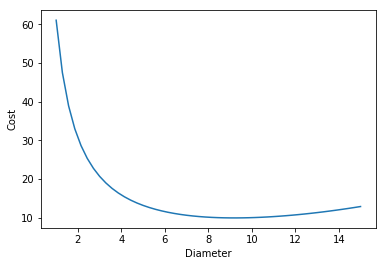

In [1]:
import numpy as np
from scipy.optimize import minimize

V = 355
ct = 0.025  # Cost of the top $/cm**2
cs = 0.043  # Cost of the side $/cm**2

def cost(D):
    radius = D / 2
    top_area = np.pi * radius**2
    top_bottom_cost = 2 * ct * top_area
    L = 4 * V / np.pi / D**2 # solved from the volume
    side_cost = cs * L * np.pi * D
    return top_bottom_cost + side_cost

D = np.linspace(1, 15)
c = cost(D)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(D, c)
plt.xlabel('Diameter')
plt.ylabel('Cost')

You can see there is a minimum near a diameter of 10 cm. Now we just minimize the cost function.



In [1]:
sol = minimize(cost, 10)
print(sol)
D, = sol.x
L = 4 * V / np.pi / D**2
print(f'The optimal diameter is {D:1.2f} cm. The optimal length is {L:1.2f} cm. The cost is ${sol.fun:1.2f}.')

fun: 9.960758701630086
 hess_inv: array([[ 4.23703911]])
      jac: array([ -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 9.19508297])
The optimal diameter is 9.20 cm. The optimal length is 5.35 cm. The cost is $9.96.